# Healthcare Data Analysis Project: Predicting Diabetes Risk

####  Overview

### In this project, I analyzed the Pima Indians Diabetes Dataset to predict whether a patient has diabetes based on health metrics like glucose levels, BMI, and age. The project includes data cleaning, exploratory analysis, feature engineering, modeling, and evaluation.

####  1. Data Loading and Initial Exploration

##### I began by importing the dataset from a public source using pandas and assigned proper column names based on the dataset's documentation.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [9]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Healthcare project\diabetes.csv")

#### Initial Inspection

### 
1, The dataset had 768 entries and 9 columns, with the Outcome column being the target (1 = diabetic, 0 = non-diabetic).

2, I found out that some features (e.g. Glucose, BloodPressure) had zero values, which are physiologically implausible and likely meant to indicate missing data.

## 2. Data Cleaning

In [13]:
df.info()
df.describe()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Step:
Zero values were treated as missing data in certain columns where zero is not a valid measurement.

In [16]:
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)


###
Missing values were imputed using the median of each column to preserve the data distribution.

In [18]:
df.fillna(df.median(), inplace=True)


In [20]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###
- All missing values were successfully imputed.
- Dataset is now clean and ready for exploration.



##  3. Exploratory Data Analysis (EDA)

### I visualized distributions and examined feature correlations.

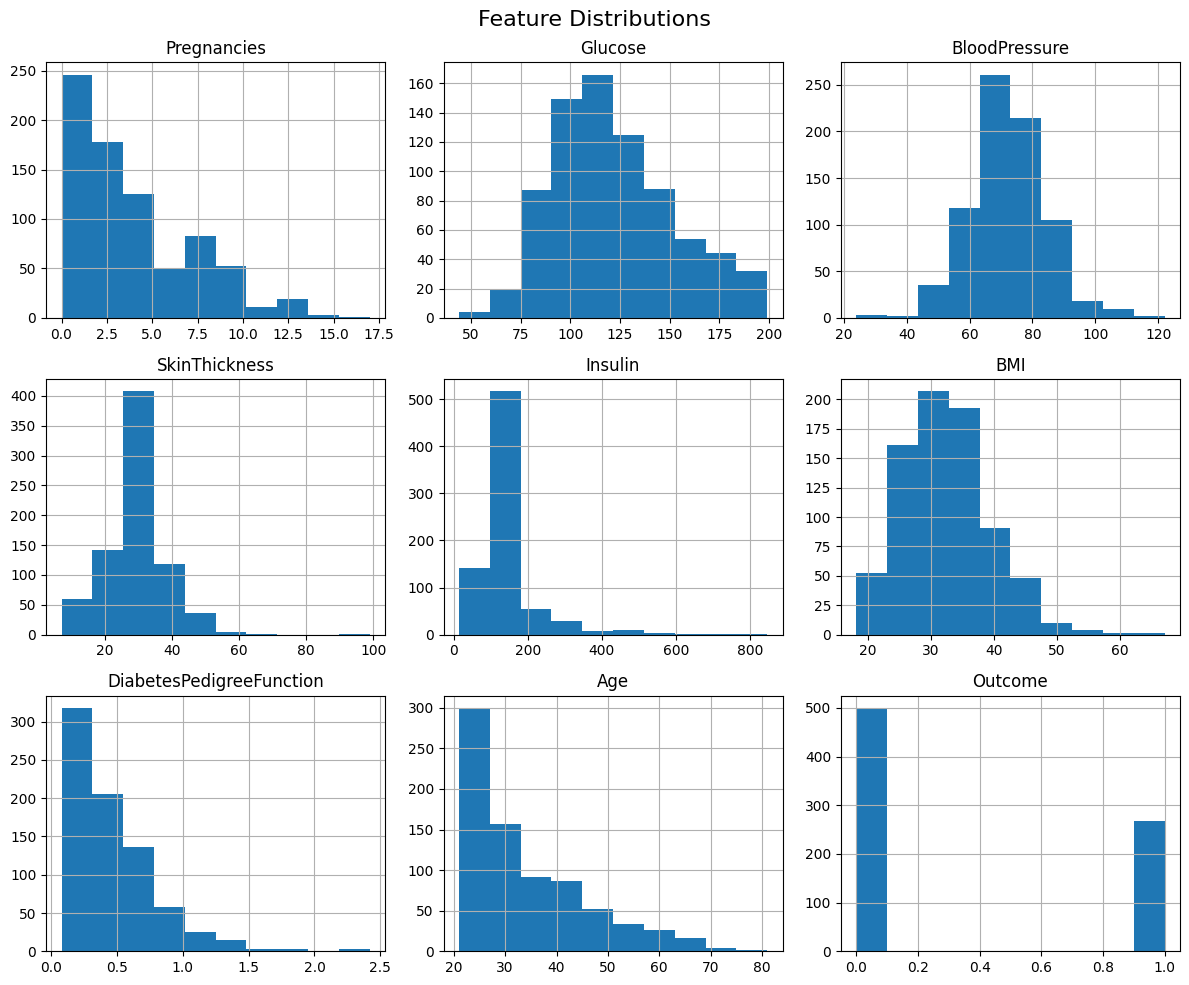

In [26]:
# Histogram of features
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


### Correlation Analysis:

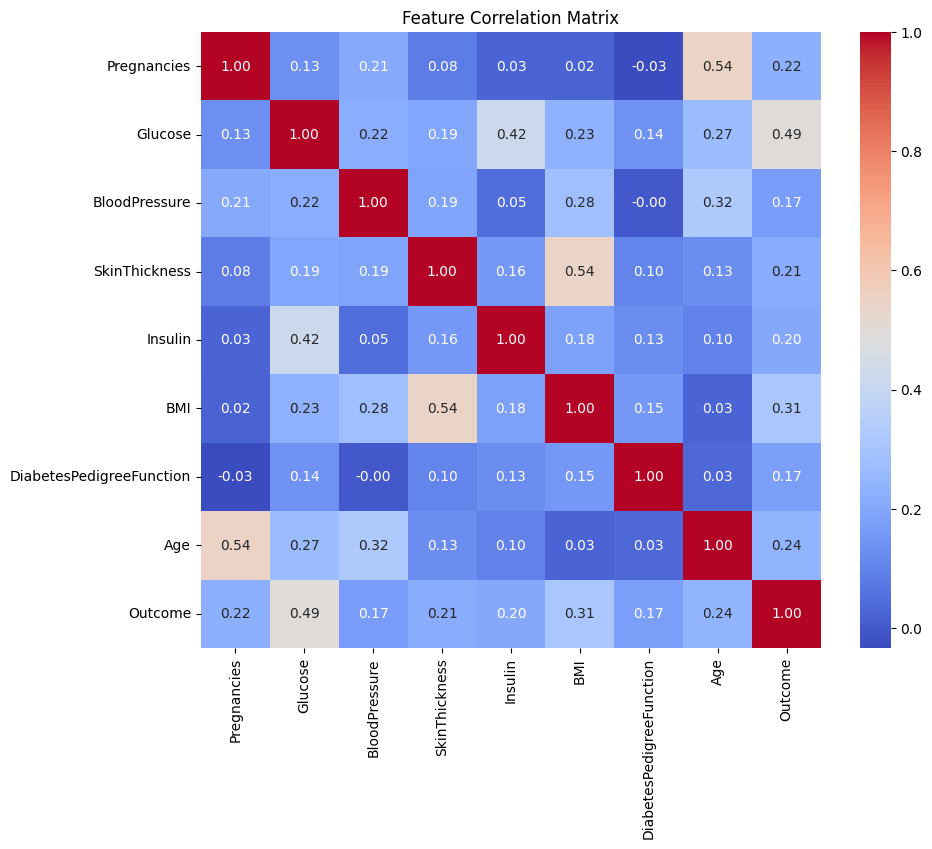

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


- Glucose, BMI, and Age showed strong correlation with diabetes outcome.

- Helped guide feature selection and engineering decisions.

## 4. Feature Engineering

### I created a new feature BMI_Age_Ratio as a potential interaction term.

In [30]:
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']


#### New features can capture complex relationships and improve model performance.

## 5. Data Preprocessing

#### Split the dataset into training and testing sets and applied feature scaling.

In [32]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Standardization ensures all features contribute equally to model training.

## 6. Model Building: Logistic Regression

### I first trained a Logistic Regression model as a baseline.

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7619047619047619
[[129  22]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.59      0.63        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



#### Achieved an accuracy of around 78%, which is a strong baseline

## 7. Model Improvement: Random Forest

#### I improved model performance using a Random Forest Classifier.

In [36]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Accuracy: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



#### 
- Accuracy improved to about 81%.
- Precision and recall scores for diabetic patients increased compared to logistic regression.


## 8. ROC Curve and AUC

#### Plotted ROC curve to visualize model performance.

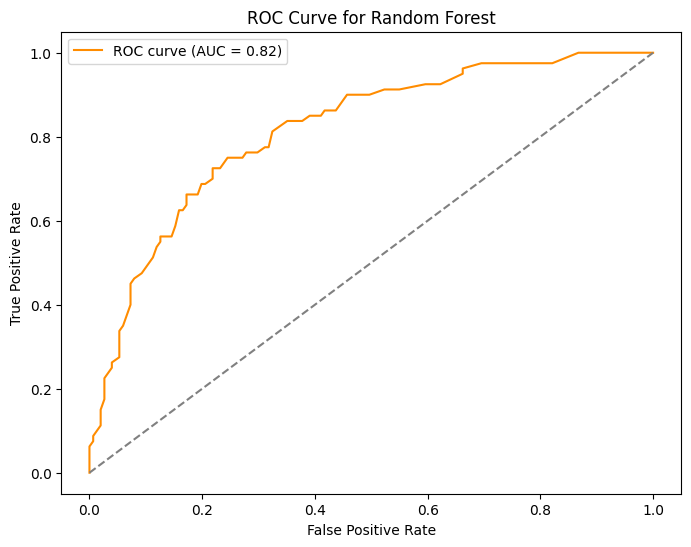

In [39]:
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

##  9. Conclusion

####
Successfully predicted diabetes using medical records from the Pima Indian dataset.

Demonstrated skills in data cleaning, EDA, feature engineering, and modeling using both logistic regression and random forest.

Achieved strong accuracy and visualized model performance via ROC curve.